# Sesión 1 : Introducción al machine learning






# Teoría

## Análisis y Preprocesamiento de Datos

En esta sesión aplicaremos los conceptos de carga de datos, análisis exploratorio (EDA) y la importancia del escalamiento de características (Feature Scaling) antes de entrenar cualquier modelo.

#### 1. Carga y Estructura del Dato
Para manipular datos tabulares (filas y columnas), el estándar en Python es la librería **Pandas**.
Utilizaremos el dataset *Wine* (Vinos), un conjunto de datos clásico disponible en **Scikit-Learn** que contiene resultados de análisis químicos de vinos cultivados en Italia.

In [ ]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np
# 1. Cargamos el dataset "crudo" (formato diccionario)
raw_data = load_wine()

# 2. Uso Básico: Transformación a DataFrame
# Los algoritmos de ML necesitan matrices, pero los humanos necesitamos tablas con nombres.
df = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)

# Añadimos la columna objetivo (lo que queremos predecir)
df['target'] = raw_data.target

# 3. Inspección inicial
# .head() nos muestra las primeras 5 filas para ver qué pinta tienen los datos
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### 2. Análisis Exploratorio de Datos (EDA)
Antes de modelar, debemos auditar la materia prima. Buscamos diagnósticos de ingeniería:

1.  **Estudio Estadístico:** ¿Están las clases balanceadas? ¿Necesitamos escalar?
2.  **Estudio de Correlación (Heatmap):** ¿Hay variables redundantes (*Multicolinealidad*) que debamos eliminar?
3.  **Estudio de Separabilidad (Pairplot):** ¿Son las clases separables linealmente o necesitamos un Kernel no lineal?

📊 1. Resumen de Clases y Escalas:


,Proporción (%)
target,
1,39.887640
0,33.146067
2,26.966292


,mean,std,min,max
alcohol,13.000618,0.811827,11.03,14.83
malic_acid,2.336348,1.117146,0.74,5.80
ash,2.366517,0.274344,1.36,3.23
alcalinity_of_ash,19.494944,3.339564,10.60,30.00
magnesium,99.741573,14.282484,70.00,162.00



 Mapa de Calor de Correlaciones...


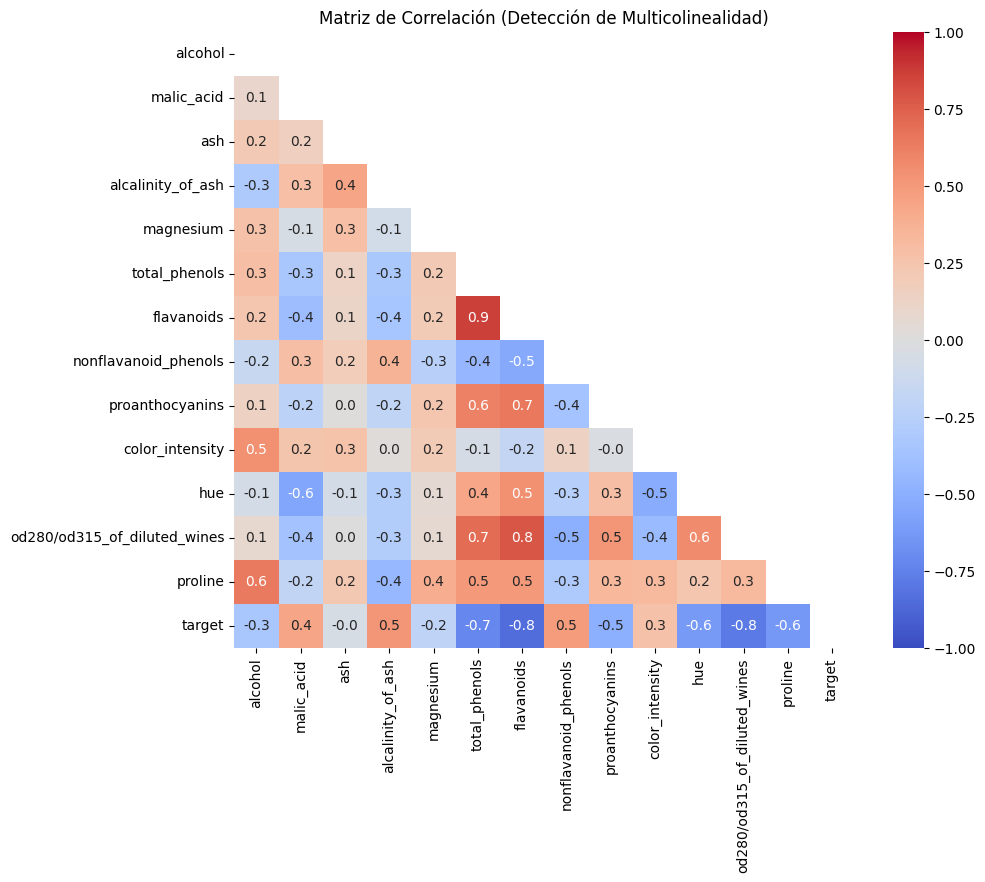


🎨 Pairplot (Variables Clave)...


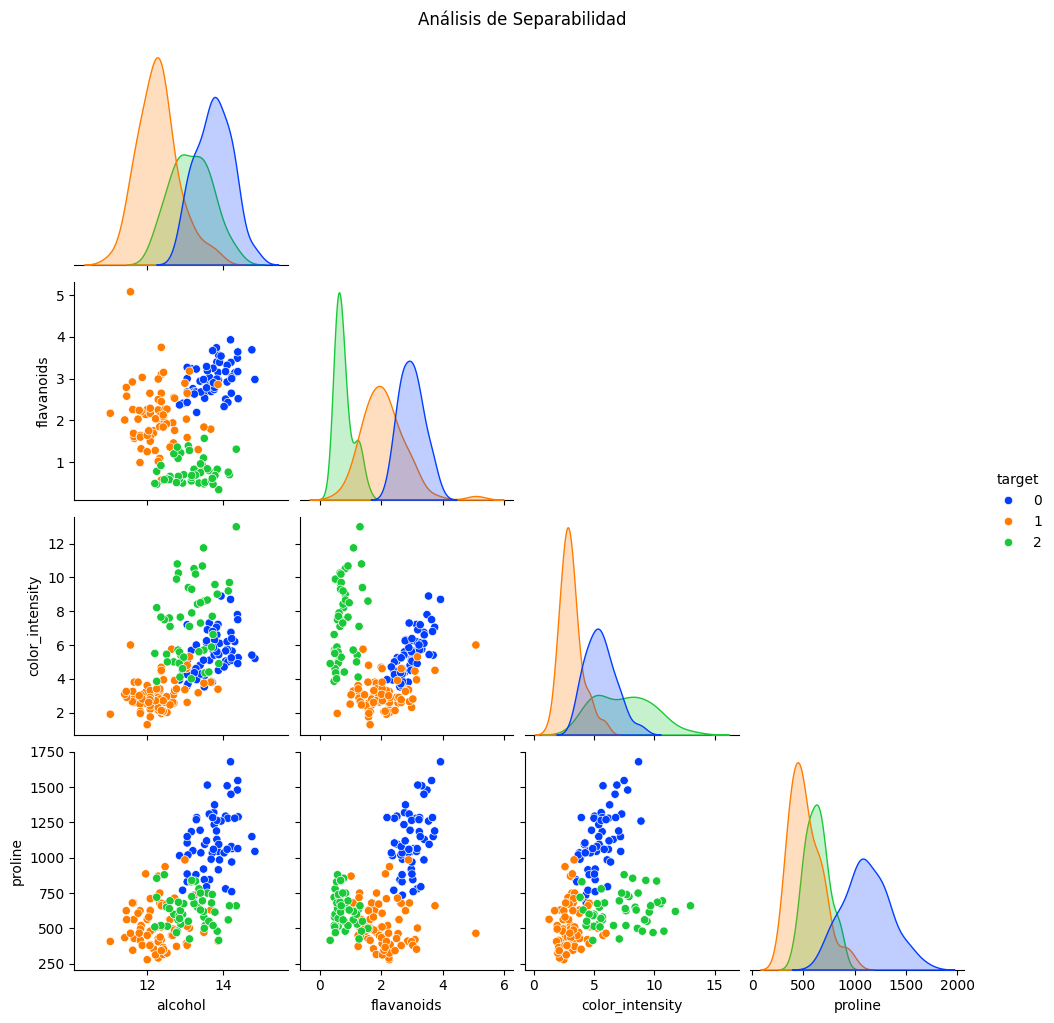

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Configuración del lienzo gráfico
fig, ax = plt.subplots(figsize=(10, 8))

# --- PASO 1: AUDITORÍA ESTADÍSTICA (LOS NÚMEROS) ---
print("📊 1. Resumen de Clases y Escalas:")
display(df['target'].value_counts(normalize=True).to_frame('Proporción (%)') * 100)
display(df.describe().T[['mean', 'std', 'min', 'max']].head(5))

# --- PASO 2: AUDITORÍA DE CORRELACIÓN (EL MAPA DE CALOR) ---
print("\n Mapa de Calor de Correlaciones...")

# Calculamos la matriz de correlación (Pearson)
corr_matrix = df.corr()

# Pintamos el Heatmap
# annot=True: Escribe el número dentro de la celda
# fmt=".1f": Redondea a 1 decimal para que sea legible
# mask: Opcional, oculta la mitad superior repetida (triángulo superior)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm',
            vmin=-1, vmax=1, mask=mask, ax=ax)
plt.title("Matriz de Correlación (Detección de Multicolinealidad)")
plt.show()

# --- PASO 3: AUDITORÍA DE SEPARABILIDAD (PAIRPLOT) ---
print("\n🎨 Pairplot (Variables Clave)...")
# Seleccionamos variables que el Heatmap sugiera como interesantes (alta correlación con target)
cols_interes = ['alcohol', 'flavanoids', 'color_intensity', 'proline', 'target']

sns.pairplot(df[cols_interes], hue='target', palette='bright', corner=True)
plt.suptitle("Análisis de Separabilidad", y=1.02)
plt.show()

#### Interpretación

1.  **Correlaciones (Heatmap):**
    * Fíjate en **Flavanoids** y **Total_Phenols**. Tienen una correlación de **0.9** (Rojo oscuro).
    * *Alerta de Ingeniería:* Esto es **Multicolinealidad** (Sección 8.1.1). Ambas variables aportan la misma información. En un modelo lineal estricto, deberíamos borrar una de las dos para reducir ruido.

2.  **Escalas (Describe):**
    * `Proline` llega a 1680 y `Hue` apenas pasa de 1.
    * *Acción:* Confirmamos la necesidad obligatoria de `StandardScaler`.

3.  **Separabilidad (Pairplot):**
    * Observa el cruce **Flavanoids vs Alcohol**. Las clases 0, 1 y 2 están bien definidas.
    * *Hipótesis:* Un modelo como SVM o Naive Bayes debería obtener un rendimiento muy alto (>90%).

### Interpretación

Tras ejecutar la celda anterior, deberías llegar a estas 3 conclusiones:

1.  **Balanceo:** Observa la tabla de proporciones. Las clases están razonablemente equilibradas (~30-40% cada una). **Conclusión:** No necesitamos aplicar técnicas de rebalanceo sintético (SMOTE).
2.  **Escalas:** Mira la tabla estadística.
    * `alcohol`: Media ~13.
    * `color_intensity`: Media ~5.
    * *(Nota: Si mirásemos 'proline' sería ~700)*.
    * **Conclusión:** Las magnitudes son dispares. Es **obligatorio** usar `StandardScaler` antes de entrenar modelos basados en distancias (SVM/KNN).
3.  **Separabilidad:** Mira el Pairplot.
    * Observa el cruce **Flavanoids vs Alcohol**.
    * Las nubes de puntos (Colores) están bastante separadas, aunque hay zonas de solapamiento ligero.
    * **Conclusión:** El problema tiene buena pinta. Un modelo lineal podría funcionar decentemente, pero un modelo no lineal (SVM con Kernel RBF) probablemente logre una precisión casi perfecta.

#### 3. Preprocesamiento: Escalamiento
Muchos algoritmos (como SVM o KNN) calculan distancias matemáticas. Si una variable tiene valores numéricos muy grandes (ej. 1000) y otra muy pequeños (ej. 0.1), la grande dominará el cálculo.

Vamos a comparar dos variables reales del dataset:
* `proline`: Tiene valores en los cientos/miles.
* `hue`: Tiene valores pequeños (alrededor de 1.0).

Usaremos `StandardScaler` de Scikit-Learn para aplicar la **Estandarización (Z-Score)** vista en el Módulo 2.
Formula: $z = (x - \mu) / \sigma$

In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Seleccionamos solo dos columnas para el ejemplo visual
subset_data = df[['proline', 'hue']].values

# 2. Instanciamos el escalador
scaler = StandardScaler()

# 3. Ajustamos y transformamos (Fit & Transform)
# El escalador aprende la media y la desviación típica y aplica la fórmula
scaled_data = scaler.fit_transform(subset_data)

# --- VISUALIZACIÓN COMPARATIVA ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfica 1: Datos Originales
ax1.scatter(subset_data[:, 0], subset_data[:, 1], c=df['target'], alpha=0.6)
ax1.set_title("Datos Crudos (Sin Escalar)")
ax1.set_xlabel("Proline (Rango 200 - 1600)")
ax1.set_ylabel("Hue (Rango 0.5 - 1.5)")
# Nota cómo el eje X es gigante comparado con el Y

# Gráfica 2: Datos Escalados
ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], c=df['target'], alpha=0.6)
ax2.set_title("Datos Estandarizados (StandardScaler)")
ax2.set_xlabel("Proline (Desviaciones Estándar)")
ax2.set_ylabel("Hue (Desviaciones Estándar)")
# Nota cómo ambos ejes ahora están centrados en 0 y tienen el mismo rango visual

plt.tight_layout()
plt.show()

## Entrenamiento y validación

### 3. Metodología de Validación
**Referencia:** Manual Secciones 13.2 (Protocolo de División) y 15.3 (Escalamiento Correcto).

El error más grave de un principiante es el **Data Leakage** (Fuga de Información):
1.  Escalar todo el dataset *antes* de dividir (el modelo "ve" la media del Test).
2.  Evaluar con los mismos datos de entrenamiento.

**División de datos:**
1.  **Split:** Dividimos en Train (Entrenamiento) y Test (Evaluación Final).
2.  **Aislamiento:** El escalador (`StandardScaler`) se ajusta (`.fit`) **SOLO** con los datos de Train. Luego, aplicamos esa transformación (`.transform`) al Test.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Definimos Features (X) y Target (y)
X = df.drop('target', axis=1)
y = df['target']

# 2. División Train/Test (Hold-Out)
# stratify=y: Asegura que la proporción de vinos (Clase 0, 1, 2) sea igual en Train y Test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensiones de Entrenamiento: {X_train.shape}")
print(f"Dimensiones de Test: {X_test.shape}")

# 3. Escalamiento (PREVENCIÓN DE DATA LEAKAGE)
scaler = StandardScaler()

# AJUSTAMOS solo con Train (aprendemos la media/std de entrenamiento)
X_train_scaled = scaler.fit_transform(X_train)

# TRANSFORMAMOS el Test usando las reglas aprendidas en Train
X_test_scaled = scaler.transform(X_test)

# 4. Entrenamiento del Modelo (Usamos un modelo lineal simple como base)
# SGDClassifier = Stochastic Gradient Descent (Sección 12.1.2 del manual)
model = SGDClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Predicción
y_pred = model.predict(X_test_scaled)

print("✅ Modelo entrenado y validado.")

### 4. Evaluación de Resultados
**Referencia:** Manual Sección 17 (Métricas).

No nos basta con la `Accuracy`. Necesitamos auditar los errores específicos usando la **Matriz de Confusión**.
* **Diagonal:** Aciertos.
* **Fuera de Diagonal:** Errores (Falsos Positivos/Negativos).

In [ ]:
# Generamos la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización Profesional
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Ground Truth)')
plt.title('Matriz de Confusión (Test Set)')
plt.show()

# Reporte detallado (Precision, Recall, F1)
print("\n📋 Reporte de Clasificación Riguroso:\n")
print(classification_report(y_test, y_pred))

### 5. Comparativa Algorítmica: Probabilidad vs. Geometría
**Referencia:** Manual Módulo 5 (Naive Bayes y SVM).

El dataset de vinos es sencillo (linealmente separable). Para ver la potencia real de los algoritmos, vamos a usar un dataset sintético complejo: **`make_moons`** (dos lunas entrelazadas).

**El Duelo:**
1.  **Gaussian Naive Bayes:** Enfoque probabilístico.
2.  **SVM Lineal:** Intenta separar con una recta.
3.  **SVM RBF (Radial Basis Function):** Usa el "Kernel Trick" para curvar el espacio (Sección 28).

In [ ]:
from sklearn.datasets import make_moons
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# --- 1. GENERACIÓN DE DATOS NO LINEALES ---
# Generamos 300 puntos con forma de lunas y un poco de ruido
X_moon, y_moon = make_moons(n_samples=300, noise=0.2, random_state=42)

# Función auxiliar para pintar fronteras (Ingeniería Visual)
def plot_boundary(model, X, y, ax, title):
    # Entrenar
    model.fit(X, y)

    # Crear malla de fondo
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predecir todo el fondo
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Pintar mapa de contorno
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    ax.set_title(title)

# --- 2. EL DUELO DE ALGORITMOS ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# A. Naive Bayes (Probabilístico)
plot_boundary(GaussianNB(), X_moon, y_moon, axes[0], "Gaussian Naive Bayes")

# B. SVM Lineal (Geométrico Rígido - Underfitting)
plot_boundary(SVC(kernel="linear", C=1), X_moon, y_moon, axes[1], "SVM Lineal (Underfitting)")

# C. SVM RBF (Geométrico Flexible - Kernel Trick)
plot_boundary(SVC(kernel="rbf", gamma='scale', C=1), X_moon, y_moon, axes[2], "SVM RBF (Adaptación)")

plt.tight_layout()
plt.show()

### Análisis

Observemos las gráficas resultantes:

1.  **SVM Lineal:** Falla estrepitosamente. Intenta cortar dos curvas con una recta única. Esto es un caso de libro de **Alto Bias (Underfitting)**.
2.  **SVM RBF:** Gracias al *Kernel Trick* (Sección 28), el modelo proyecta los datos y encuentra una frontera curva perfecta.
3.  **Naive Bayes:** Se defiende bien, pero sus fronteras suelen ser más difusas/elipsoidales.

**Lección:** Si los datos no son lineales, aumentar la complejidad del modelo (pasar de Linear a RBF) es necesario.

# Ejercicio

## 🏆 Reto Final: Diagnóstico Médico (Torneo de Modelos)

**Dataset:** `load_breast_cancer` (Scikit-Learn).
**Objetivo:** Diagnosticar tumores malignos vs benignos.
**Referencia:** Manual Sección 18.2 (Precision vs Recall).

**Instrucciones:**
1.  Carga el dataset y transformalo a DataFrame.
2.  Realiza el Split (Train/Test) con estratificación.
3.  **IMPORTANTE:** Aplica `StandardScaler` correctamente (Fit en Train, Transform en Test).
4.  **El Torneo:** Entrena los tres modelos que hemos visto en el curso:
    * **Lineal:** `SGDClassifier` (Descenso del Gradiente).
    * **Probabilístico:** `GaussianNB` (Naive Bayes).
    * **Geométrico:** `SVC` (Support Vector Machine con Kernel RBF).
5.  **Comparativa:** Genera un DataFrame que muestre las métricas de cada uno para elegir el ganador.

**Pregunta de Negocio:**
En este caso médico, observa los **Falsos Negativos** (Predecir Benigno cuando es Maligno). ¿Deberíamos optimizar la métrica **Recall** o la **Precision**?

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- 1. PREPARACIÓN DE DATOS ---
data = load_breast_cancer()
X = data.data
y = data.target

print(f"Dimensiones: {X.shape}")

# TODO: Split (Test=20%, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = ________________________________

# TODO: Escalamiento (Fit en Train, Transform en Test)
scaler = __________________
X_train_sc = scaler.__________________(X_train)
X_test_sc = scaler.__________________(X_test)


# --- 2. DEFINICIÓN DE MODELOS (EL TORNEO) ---
# Diccionario de modelos para iterar fácilmente
models = {
    "SGD (Lineal)": SGDClassifier(random_state=42),
    "Naive Bayes": __________________,  # Instancia el modelo Gaussiano
    "SVM (RBF)": __________________     # Instancia el SVC con kernel='rbf'
}

# Almacenaremos los resultados aquí
results = []

print("🏁 Iniciando Torneo de Modelos...\n")

for name, model in models.items():
    # A. Entrenar
    model.fit(__________, __________)

    # B. Predecir
    y_pred = model.predict(__________)

    # C. Calcular Métricas
    # TODO: Calcula las métricas usando las funciones importadas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = __________________(y_test, y_pred) # Queremos el Recall
    f1 = __________________(y_test, y_pred)  # Queremos el F1

    # Guardamos en la lista
    results.append({
        "Modelo": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"✅ {name} entrenado.")


# --- 3. COMPARATIVA FINAL ---
# Convertimos la lista de resultados a DataFrame para verla bonita
results_df = pd.DataFrame(results)

# Ordenamos por Recall (ya que es diagnóstico médico)
results_df = results_df.sort_values(by="Recall", ascending=False)

print("\n📊 Tabla de Resultados del Torneo:")
display(results_df)

# PISTA PARA LA PREGUNTA FINAL:
# Recall = TP / (TP + FN) -> Si maximizo Recall, minimizo los Falsos Negativos (Muertes evitables).